# QUIZ 1

1. Mean vs median filtering
2. Sharpening kernel equation
3. Sobel horizontal gradient kernel
sobel_horizontal = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])

prewitt_horizontal = np.array([
    [-1, -1, -1],
    [ 0,  0,  0],
    [ 1,  1,  1]
])


# QUIZ 2

1. The dissimilarity between two matrices \( A \) and \( B \) is given by the formula:

$$
D = \sum_{i=1}^{3} \sum_{j=1}^{3} (A_{ij} - B_{ij})^2
$$




2. Camera projection
$$
\begin{bmatrix}
u \\
v \\
w
\end{bmatrix}
=
K \cdot
\begin{bmatrix}
R & t
\end{bmatrix}
\cdot
\begin{bmatrix}
X \\
Y \\
Z \\
1
\end{bmatrix}
$$


$$
\text{Camera matrix } K
$$
$$
K =
\begin{bmatrix}
725 & 0 & 631 \\
0 & 726 & 360 \\
0 & 0 & 1
\end{bmatrix}
$$

$$
\text{Rotation matrix } R
$$
$$
R =
\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

$$
\text{Project into image plane}
$$
$$
\begin{bmatrix} u \\ v \\ w \end{bmatrix}
=
\begin{bmatrix}
725 & 0 & 631 \\
0 & 726 & 360 \\
0 & 0 & 1
\end{bmatrix}
\cdot
\begin{bmatrix}
1 \\
1 \\
5
\end{bmatrix}
=
\begin{bmatrix}
725 \cdot 1 + 0 \cdot 1 + 631 \cdot 5 \\
0 \cdot 1 + 726 \cdot 1 + 360 \cdot 5 \\
1 \cdot 5
\end{bmatrix}
=
\begin{bmatrix}
3680 \\
2160 \\
5
\end{bmatrix}
$$

$$
\text{Normalize to find pixel coordinates}
$$
$$
u = \frac{3680}{5} = 736
$$
$$
v = \frac{2160}{5} = 432
$$

3. Fundamental matrix and essential matrix
The fundamental matrix projects a point in the right image frame to a point in the left image.
The essential matrix includes the pose of the cameras with respect to each other.

| Aspect              | Fundamental Matrix (F)                         | Essential Matrix (E)                             |
|---------------------|-------------------------------------------------|--------------------------------------------------|
| **Camera Calibration** | Works with uncalibrated cameras.               | Requires calibrated cameras.                    |
| **Matrix Size**       | 3×3 matrix.                                    | 3×3 matrix.                                     |
| **Intrinsic Parameters** | Does not require intrinsic parameters (focal length, etc.). | Uses intrinsic parameters of the cameras.       |
| **Relationship**      | Describes the epipolar geometry between two views. | Describes the camera rotation and translation.   |
| **Computation**       | Can be computed with correspondences between images. | Computed by using the fundamental matrix and camera calibration. |
| **Use Case**          | Used for uncalibrated stereo vision, epipolar geometry. | Used for calibrated stereo systems and camera pose estimation. |

4. Epipolar lines and epipoles
Epipolar lines - are the lines on the second image where points corresponding to a specific point in the first image must lie.
Epipoles - are the points where the line connecting the two cameras intersects each image. If we draw a straight line from one camera and one from the second the point where they meet is the epipole.

The epipoles lie on the baseline-containing line
All epipolar lines intersect at the epipoles
All epipolar lines meet at the optical center
The epipoles can be outside the images

5. 
- Dense Local Stereo Vision Algorithm (Least Demanding):

    Why: Despite the name "dense," this algorithm works by computing disparity at each pixel based on local information, often using a sliding window or local matching criteria. It doesn't require global optimization, which makes it computationally less demanding than global methods. By considering a local neighborhood around each pixel, it makes it easier to process and faster compared to graph cuts or dynamic programming-based algorithms.
    Computational Complexity: The complexity mainly depends on the size of the local window and the disparity range but remains manageable. It is relatively simple because it operates locally and doesn't need to solve large-scale optimization problems.

- Dense Dynamic Programming-based Stereo Vision Algorithm:

    Why: This algorithm uses dynamic programming to find the optimal disparity map. Dynamic programming has the advantage of optimizing a cost function for each pixel while considering neighboring pixels, but it involves a recursive process. While it’s more computationally demanding than the dense local stereo approach, it still doesn't require the global optimization and graph-related operations present in graph cuts-based algorithms.
    Computational Complexity: Dynamic programming has a higher computational cost than dense local methods, especially because it optimizes over a larger neighborhood, but it’s still simpler than graph-based methods in terms of both memory and computation.

- Dense Graph Cuts-based Stereo Vision Algorithm (Most Demanding):

    Why: The Dense Graph Cuts-based Stereo Vision Algorithm is the most computationally expensive because it requires solving a global optimization problem using graph cuts. Each pixel is treated as a node, and matching costs between pixels are computed using a global energy function that needs to be minimized across the entire image. The computational cost rises significantly as the image size and disparity range increase because graph cuts algorithms must process a large graph and iteratively optimize it.
    Computational Complexity: The complexity is high due to the large-scale optimization that involves solving a graph problem for the entire image. It typically requires significantly more computational resources and time than both dynamic programming and local algorithms.

# QUIZ 3

Some theory:

1. Kabsch algorithm - The Kabsch Algorithm is a mathematical method used to align two sets of points in space by finding the best rotation (and optionally translation) that minimizes the difference between the two sets.

2. ICP (Iterative closest point)
    - For each point find the nearest point in the second model, use all point pairs to estimate transformation from model 1 to 2. Apply this transformation to the model 1. Repeat until convergence/stop criterion is met.

    - For estimating the transformation between models given point pairs (p,q) we can use Kabsch algorithm. Those are steps for it:
        - Find the center of each shape (centroid), which is the average of all its points.
        - Shift both shapes to the origin, to make the math easier.
        - Compare the shapes by creating a covariance matrix. Covariance measures how much two variables change together. If they tend to increase or decrease together, their covariance is positive; if one goes up while the other goes down, their covariance is negative. The covariance matrix is a way of organizing the covariance information for all pairs of these variables in a table.
        - Then using covariance matrix we figure out the best rotation. To get the perfect roation we use something called SVD (singular value decomposition). This gives us the rotation matrix
        - After rotating we also figure out the translation.

    - Some facts:
        - ICP is not guaranteed to provide the optimal transformation. ICP is sensitive to the initial alignment (starting guess) and can converge to a local minimum, so it may not always provide the best solution.
        - ICP provides a rigid transformation between 2 point clouds, meaning only rotation and translation are applied with no scaling or shearing.
        - ICP works best if an initial rough estimation of the alignment of 2 point clouds is known.
        - ICP doesn't provide an affine transformation between 2 point clouds. An affine transformation allows for scaling, shearing, and translation, which ICP does not consider.

3. K- means - popular and straightforward unsupervised machine learning algorithm used for clustering data into k groups.
How it works:
    1. Choose k: Decide the number of clusters.
    2. Initialize centroids: Place k centroids randomly or using a method like k-means++ for better initial placements.
    3. Assign points to clusters:
        - For each data point, compute its distance to all centroids.
        - Assign the point to the cluster with the nearest centroid.

    4. Update centroids:
        - Recalculate the centroid of each cluster as the mean of all the points assigned to that cluster.

    5. Repeat:
        - Alternate between assigning points to clusters and updating centroids until: Centroids no longer move significantly (convergence), or a maximum number of iterations is reached.

4. DBSCAN - can be used when we have data that's nested, where K-means would return something not correct.
How it works:
    1. Start with some point in the dataset.
    2. Visit the point and see if it was at least MinPts neighbours within the radius r. If it does it becomes a core point.
    3. Expand the cluster: for each point in the cluster, check it's neighbors with r. Add all unvisited core points and their neighbours to the cluster. Include border points that are within the radius r. Border points are NOT used to expand the cluster. They are just added to it.
    4. Repeat until all the points are visited.

5. Mean shift - a simple, non-parametric clustering algorith. Doesn't need a predefined number of clusters. It uses areas to find high density regions. It 'shifts' each point towards the average (mean) of the points in the neighbourhood. Mean Shift doesn't assume any number of clusters. Instead, it starts by considering every data point as a potential cluster center.

6. Elbow method - method for detecting optimal number of clusters. When we see a significant flattening of the curve it indicates that we reached optimal number of clusters. WCSS (Within-Cluster Sum of Squares) is a measure used to evaluate the compactness of the clusters in clustering algorithms like K-means. WCSS quantifies how tightly the data points within each cluster are grouped around the cluster's centroid (center).


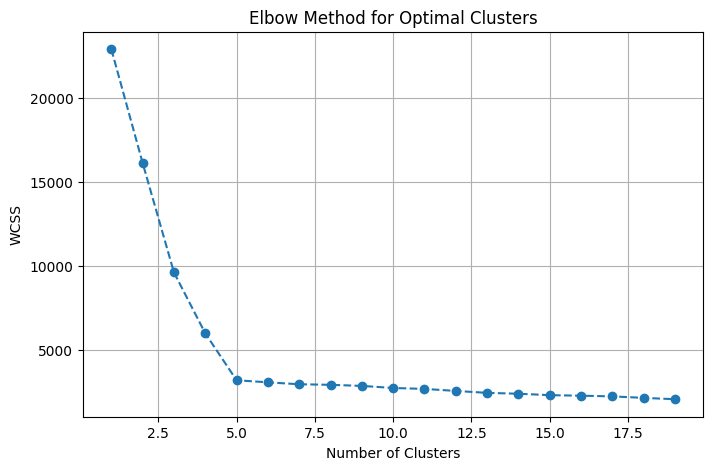

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Elbow method
X = np.loadtxt('data.txt')
cluster_range = range(1,20)

wcss = []

for n in cluster_range:
    km = KMeans(n_clusters=n, random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(cluster_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()



# QUIZ 4
1. PCA (Principal Component Analysis) is a statistical technique used to simplify data while retaining its most important patterns, especially by reducing its dimensionality. The key steps are:

    - Center the input data: Subtract the mean of each feature so the data is centered around zero. This is necessary for PCA to focus on variance rather than absolute values.

    - Calculate the covariance matrix: The covariance matrix describes how the features in the data vary with respect to each other.

    - Compute eigenvectors and eigenvalues of the covariance matrix:
        - The eigenvectors represent the principal components of the data — the directions where the data varies most.
        - The eigenvalues measure the amount of variance along each eigenvector. A larger eigenvalue indicates a direction of higher variance.
        - The first principal component is the eigenvector with the largest eigenvalue, representing the direction of maximum variance in the data.
        - The second principal component is orthogonal to the first and captures the next largest variance.

    - Sort eigenvectors by their eigenvalues: The principal components are ordered by the amount of variance they explain, with the largest eigenvalue first.

    - Variance score (significance): The significance of each principal component is given by the ratio of its eigenvalue to the sum of all eigenvalues, representing the amount of variance it explains.

PCA is a dimensionality reduction technique. It reduces the number of dimensions (or features) in a dataset while retaining the most significant features, which helps in simplifying the data and making it easier to analyze. PCA in a 5-dimensional space can create exactly 5 new features.

2. SVM - support vector machines, geometric methods for classification. SVM tries to find a line, plane or hyperplane (higher dimension) that best separetes the two classes. The border should be positioned in such a way so that it has the maximum margin from the closest points of both classes. If the data in not linearly separable, SVM uses a kernel trick. This transforms the data into higher-dimensional space, where linear separation is possible. But it doesn't always guarantee perfect separation. It's also sensitive to noise.

3. Classification problem - The best value of k depends on the distribution of your data and the balance between the classes. k-NN (k-Nearest Neighbors) is a positive integer that determines how many neighbours will be considered. Algorithm chooses a point and looks at k-NN and if there is a majority of some class it classifies this point as this class.

    Imagine you have a training set of animals with the following features (species, weight):

    - **Class A (cat)**: 4 animals, weights: 5kg, 6kg, 6.5kg, 7kg
    - **Class B (dog)**: 5 animals, weights: 20kg, 22kg, 23kg, 25kg, 30kg

    Now, a new animal appears with weight = 6kg. The algorithm will:

    1. **Find the k nearest neighbors** (e.g., 3 nearest animals based on weight).
    2. **Look at the classes** of those 3 nearest neighbors.
        - Let’s say the 3 closest neighbors are 2 cats (Class A) and 1 dog (Class B).
    3. **Since Class A (cat)** has the majority vote (2 out of 3), the new animal will be classified as **Class A (cat)**.

To effectively select k, you'd typically use cross-validation. Cross-validation splits your data into multiple training and testing sets, and you can test different values of k on these sets to find the one that gives the lowest error or highest accuracy on the validation set.

4. Expected accuracy from being the best to the worst: 2D to 2D, 3D to 2D, 3D to 3D

5. Concerning relative pose estimation, please match the problem to the solution:
    - 2D to 2D Relative Pose Estimation - Essential matrix
    - 3D to 2D Relative Pose Estimation - PnP
    - 3D to 3D Relative Pose Estimation - ICP


6. Answer at the bottom


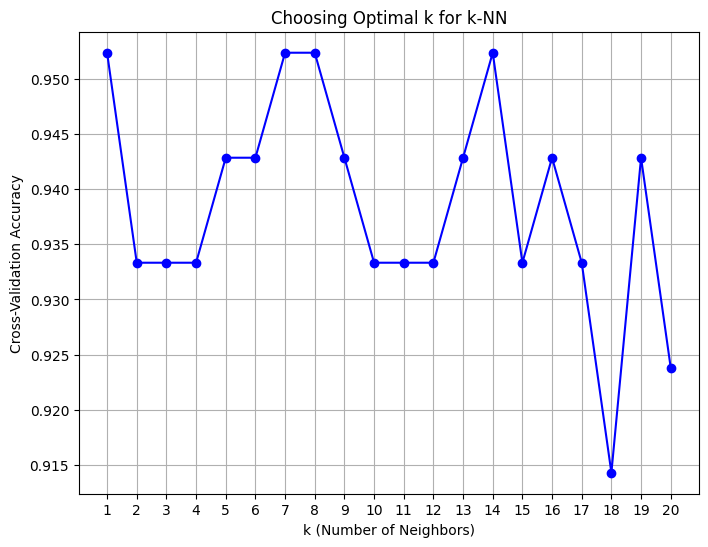

The optimal value of k is 1 with accuracy of 0.95


In [4]:
# Choosing correct k

import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# 1. Load a sample dataset (e.g., Iris dataset)
data = load_iris()
X = data.data  # Features
y = data.target  # Labels

# 2. Split the dataset into training and testing sets (optional)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. List of k values to try
k_values = range(1, 21)  # Trying k values from 1 to 20

# 4. List to store cross-validation accuracy scores for each k
cv_scores = []

# 5. Loop through k values and evaluate using cross-validation
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    cv_scores.append(scores.mean())  # Store the mean accuracy for this k

# 6. Plot the results to visualize the performance of different k values
plt.figure(figsize=(8, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='-', color='b')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Choosing Optimal k for k-NN')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# 7. Choose the optimal k based on the highest accuracy
optimal_k = k_values[np.argmax(cv_scores)]
print(f"The optimal value of k is {optimal_k} with accuracy of {max(cv_scores):.2f}")


In [ ]:
import numpy as np
import cv2

# Given values
rvec = np.array([-0.05, -1.51, -0.00])  # Rotation vector
tvec = np.array([87.39, -2.25, -24.89])  # Translation vector
camera_point = np.array([-6.71, 0.23, 21.59])  # Point in camera coordinates

# Convert the rotation vector to a rotation matrix
rotation_matrix, _ = cv2.Rodrigues(rvec)

# Calculate the inverse of the rotation matrix
rotation_matrix_inv = np.linalg.inv(rotation_matrix)

# Convert the camera point to world coordinates
world_point = rotation_matrix_inv @ (camera_point - tvec)

# Print the result
print("The interest point in world coordinates is:", world_point)
